In [22]:
# General

import numpy as np
import pandas as pd
import re
import os
import pickle

# EDA

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

# NLP 

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

# ML

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Plotly
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
data=pd.read_csv("https://raw.githubusercontent.com/rajeshmore1/Capstone-Project-2/main/Copy%20of%20Coronavirus%20Tweets.csv", encoding="ISO-8859-1")
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [25]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [26]:
data.drop(columns=['UserName','ScreenName','Location','TweetAt'],inplace=True) 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [28]:
data["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

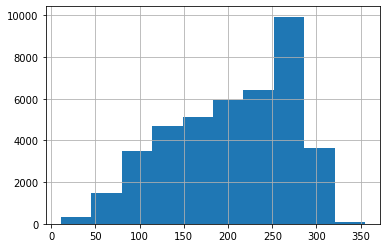

In [29]:
data['OriginalTweet'].str.len().hist()

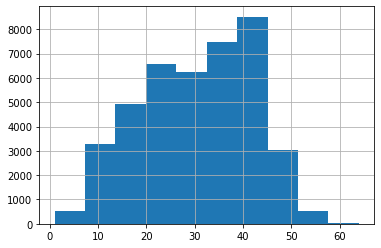

In [30]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(data['OriginalTweet'])

In [31]:
df=pd.DataFrame()
df['OriginalTweet']=data['OriginalTweet']
df['Sentiment']=data['Sentiment']
df['no_of_chars'] = data['OriginalTweet'].apply(len)
df['no_of_words'] = data['OriginalTweet'].apply(lambda x: len(nltk.word_tokenize(x)))
df['no_of_sents'] = data['OriginalTweet'].apply(lambda x: len(nltk.sent_tokenize(x)))
df['Temp'] = data['Sentiment'].map({"Positive":0,"Negative":1,"Neutral":2,"Extremely Positive":3,"Extremely Negative":4})
df.head()

OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

   no_of_chars  no_of_words  no_of_sents  Temp  
0          111           17            1     2  
1          237           38            1     0  
2          131           18            1     0  
3          306           58            4     0  
4          310           58            4     4

### EDA

#### 1) Count Plot

In [32]:
temp = pd.DataFrame()
temp['Sentiment'] = ["Positive","Negative","Neutral","Extremely Positive","Extremely Negative"]
temp['Count'] = [len(df[df['Sentiment'] == 'Positive']), len(df[df['Sentiment'] == 'Negative']),len(df[df['Sentiment'] == 'Neutral']),len(df[df['Sentiment'] == 'Extremely Positive']),len(df[df['Sentiment'] == 'Extremely Negative'])]
temp = temp.sort_values(by = ['Count'], ascending = False)
fig = px.bar(temp, x = 'Sentiment', y = 'Count', 
             color = "Sentiment", text_auto='', width = 600, 
             color_discrete_sequence = ["#AB63FA", "orange"],
             template = 'plotly_dark',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

#### 2) Pie Chart

In [33]:
fig = px.pie(temp, values = 'Count', names = 'Sentiment', width = 600, 
             color = 'Sentiment', color_discrete_map = {"Positive":"green","Negative":"yellow","Neutral":"red","Extremely Positive":"blue","Extremely Negative":"orage"},
             template = 'plotly_dark', title = "Pie Chart")
fig.show()

#### 3) Histogram

In [34]:
fig = px.histogram(df, x = 'no_of_chars', color = 'Sentiment', 
                   template = 'plotly_dark', 
                   title = "Histogram for Sentiment based on Number of Characters per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [35]:
fig = px.histogram(df, x = 'no_of_words', color = 'Sentiment', 
                   template = 'plotly_dark', 
                   title = "Histogram for Sentiment based on Number of Words per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [36]:
fig = px.histogram(df, x = 'no_of_sents', color = 'Sentiment', template = 'plotly_dark', title = "Histogram for Sentiment based on Number of Sentences per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

#### 4) Pair Plot

In [37]:
fig = px.scatter_matrix(df, dimensions=["no_of_chars", "no_of_words", "no_of_sents"], 
                        color = "Sentiment", template = 'plotly_dark', 
                        color_discrete_map = {"Positive":"#FF9900","Negative":"yellow","Neutral":"red","Extremely Positive":"blue","Extremely Negative":'#19D3F3'},
                        title = "Pair Plot")
fig.show() 

#### 5) Correlation Matrix

In [38]:
fig = px.imshow(df.corr(), text_auto = True, color_continuous_scale = 'blues', template = 'plotly_dark', title = "Correlation Matrix")
fig.show()